In [43]:
# in terminal run command:
# ipcluster start -n 4

from IPython import parallel
clients = parallel.Client()
clients.block = True
print(clients.ids)

dview = clients.direct_view()

[0, 1, 2, 3]


Use %%px and %%time at top of cells where parallel processing and timing are required.

In [44]:
%%px

# set plots to showup inline and load packages
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
%%px

apple = pd.read_csv('/Users/brucehao/Google Drive/CUNY/git/DATA602/apple.2011.csv')

In [46]:
%%px

# rename columns, drop first row and change PctChange column to numeric type
apple.columns = ['Date', 'Last', 'PctChange']
apple = apple.iloc[1:,]
apple['PctChange'] = pd.to_numeric(apple['PctChange'])
#apple.info()
#apple.tail()

In [47]:
%%px

# function to generate t+20 day stock price based on bootstrapping
def gen_price_t20():
    #np.random.seed(123)
    x = apple.PctChange.values
    ret = np.random.choice(x, size=20, replace=True)
    ret_cum = np.exp(np.sum(np.log(ret + 1)))
    price = apple.Last.tail(1).values
    return np.asscalar(price * ret_cum)

gen_price_t20()

Out[0:29]: 403.5383459540296

Out[1:29]: 378.2181236114576

Out[2:29]: 426.3794321838466

Out[3:29]: 395.25660679994337

In [48]:
%%px
%%time

# generate 10000 t+20 day stock prices
sim = []
for i in np.arange(25000):
    sim.append(gen_price_t20())

[stdout:0] 
CPU times: user 7.63 s, sys: 27.6 ms, total: 7.66 s
Wall time: 8.11 s
[stdout:1] 
CPU times: user 7.64 s, sys: 27.4 ms, total: 7.67 s
Wall time: 8.16 s
[stdout:2] 
CPU times: user 7.68 s, sys: 29 ms, total: 7.71 s
Wall time: 8.2 s
[stdout:3] 
CPU times: user 7.55 s, sys: 27.4 ms, total: 7.58 s
Wall time: 8.1 s


100000

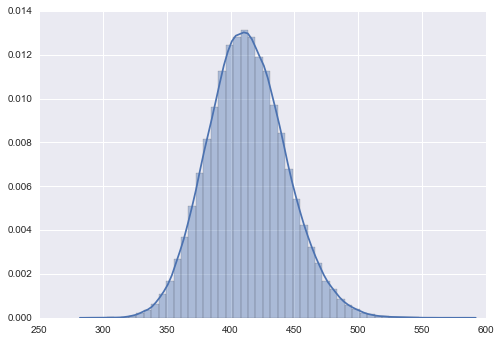

In [ ]:
# combine the sim results from each client
# check that total = 100,000
sim = dview.gather('sim')
sns.distplot(sim)
len(sim)

In [ ]:
%%time

sim_slow = []
for i in np.arange(100000):
    sim.append(gen_price_t20())

Running 25,000 simulations on each of 4 processors took just under 8 seconds; running 100,000 simulations on 1 processor took about 15 seconds. 